# EDA: Movie & TV-Show Entertainment Data analysis

# Project Preview

<img src="../assets/picture.jpg" alt="Title-Pic">

### Data StoryTelling

This dataset came from <a href="https://datacamp.com">datacamp.com</a> and contains data about the entertainment industry. <br>
Our main topic for this EDA will be the question, whether or whether not the length of movies keeps getting shorter over time. <br>
Therefor, we take a closer look to the following questions: <br>

#### Data Distribution

- Which genre is the most produced (divided by Movie and TV-Show)
- Which genre got the longest duration time (divided by Movie and TV-Show)
- Which country releases the most Movies / TV-Shows
- Which country releases the longest Movies / TV-Shows

#### Main Topic

- **Does the length of movies getting shorter over time?**

# Imports

In [1669]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame
from matplotlib.ticker import MaxNLocator


np.set_printoptions(suppress=True)

sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})
sns.set_palette("Set2")

In [1670]:
# DEVTED

def xaxis_to_integers(ax: any) -> None:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

def yaxis_to_integers(ax: any) -> None:
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [1671]:
# DEVTED
import os
import shutil
import uuid

from os.path import join, exists
from glob import glob


def get_fig_title(dirpath: str, plot_name: str) -> str:
    try:
        plot_count = len(glob(join(dirpath, "*.jpg"))) + 1
        count_prefix = zero_prefix(plot_count)

        if plot_name.strip():
            plotname = plot_name.replace(" ", "_").lower()
            return f"{count_prefix}_{plotname}"

        plotname = plt.gcf().axes[0].get_title()
        if plotname.strip():
            plotname = plotname.replace(" ", "_").lower()
            return f"{count_prefix}_{plotname}.jpg"

        return f"{count_prefix}_{uuid.uuid1().hex}.jpg"
    except:
        return f"{uuid.uuid1().hex}.jpg"

def get_plot_dirpath(notebook_name="notebook1") -> str:
    return join(os.getcwd(), "plots", notebook_name)

def saveplot(notebook_name="notebook1", plot_name="") -> str:
    dirpath = get_plot_dirpath(notebook_name)
    if not exists(dirpath):
        os.makedirs(dirpath)

    plotname = get_fig_title(dirpath, plot_name)
    full_plot_path = join(dirpath, plotname)

    plt.savefig(full_plot_path)

def clear_plots_dir(notebook_name="notebook1") -> None:
    dirpath = get_plot_dirpath(notebook_name)
    if exists(dirpath):
        shutil.rmtree(dirpath)

In [1672]:
# DEVTED
# def zeroprx(num_txt)
HOUR_MINUTES = 60
def zero_prefix(number_text: str) -> str:
    return f"0{number_text}" if int(number_text) < 10 else f"{number_text}"

# def hrstr(minutes, suffix="h", usfmt=False, milliseconds=False)
def get_hours_string(minutes: float | int) -> str:
    hour_string  = zero_prefix(int(minutes / HOUR_MINUTES))
    minutes_string = zero_prefix(int(minutes % HOUR_MINUTES))
    return f"{hour_string}:{minutes_string}h"

In [1673]:
# clear current plot dir for "Run All"
clear_plots_dir()

# Data overview

In [1674]:
DATA_PATH = "../data/netflix_data.csv"
raw_data_df = pd.read_csv(DATA_PATH, delimiter=",")
raw_data_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV


In [1675]:
df_cleaned = raw_data_df.copy()
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [1676]:
df_cleaned.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


- data from 1925 to 2021

In [1677]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [1678]:
df_cleaned.shape[0]

7787

Missing values:
- director with missing values
- cast with missing values
- country with missing values
- date_added with missing values

# Data cleaning & preprocessing

In [1679]:
df_cleaned.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [1680]:
# columns
SHOW_ID = "show_id"
TYPE = "type"
TITLE = "title"
DIRECTOR = "director"
CAST = "cast"
COUNTRY = "country"
DATE_ADDED = "date_added"
RELEASE_YEAR = "release_year"
DURATION = "duration"
DESCRIPTION = "description"
GENRE = "genre"

# added columns

# notebook constants
COUNT = "count"
MEAN = "mean"
MEDIAN = "median"

The columns we are interested in are: [RELEASE_YEAR, DURATION, TYPE, COUNTRY, GENRE].

### Filter columns

In [1681]:
needed_columns = [RELEASE_YEAR, DURATION, TYPE, COUNTRY, GENRE]
df_cleaned = df_cleaned[needed_columns]
df_cleaned

,release_year,duration,type,country,genre
0,2020,4,TV Show,Brazil,International TV
1,2016,93,Movie,Mexico,Dramas
2,2011,78,Movie,Singapore,Horror Movies
3,2009,80,Movie,United States,Action
4,2008,123,Movie,United States,Dramas
...,...,...,...,...,...
7782,2005,99,Movie,Sweden,Dramas
7783,2015,111,Movie,India,Dramas
7784,2019,44,Movie,NaN,Documentaries
7785,2019,1,TV Show,Australia,International TV


### Remove the years `1925` and `2021`
- Between the first year (`1925`) and the second year (`1942`) is an big range.
- `2021` was the running year

In [1682]:
df_cleaned[RELEASE_YEAR].value_counts().sort_index()[:10]

1925    1
1942    2
1943    3
1944    3
1945    3
1946    2
1947    1
1954    2
1955    3
1956    2
Name: release_year, dtype: int64

In [1683]:
df_cleaned = df_cleaned[(df_cleaned[RELEASE_YEAR] < 2021) & (df_cleaned[RELEASE_YEAR] > 1925)]
df_cleaned[RELEASE_YEAR].min(), df_cleaned[RELEASE_YEAR].max()

(1942, 2020)

# Data visualization & interpretation

## Does the length of Movies getting shorter over time?

### Big Picture

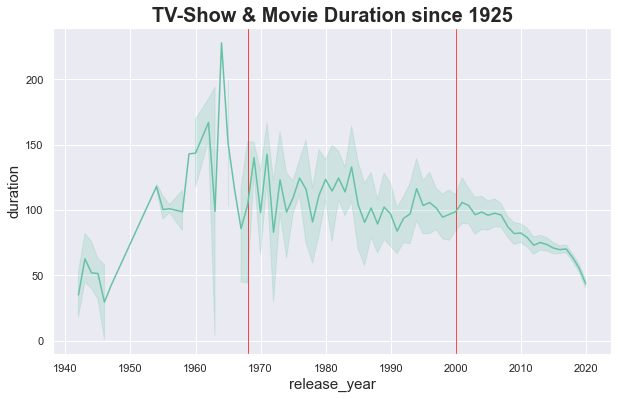

In [1684]:
plt.axvline(x=1968, color="red", linewidth=.7)
plt.axvline(x=2000, color="red", linewidth=.7)
fig = sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_cleaned).set_title("TV-Show & Movie Duration since 1925")
saveplot()

As we can see, there is a high volatility from the beginning until 1968. <br>
We also can see an steady descent of the duration since 2000.<br> 
Let's slice the data once since 1968 and once since 2000 (divided by the Type).

In [1685]:
df_cleaned[TYPE].isna().sum()

0

In [1686]:
is_movie = df_cleaned[TYPE] == "Movie"

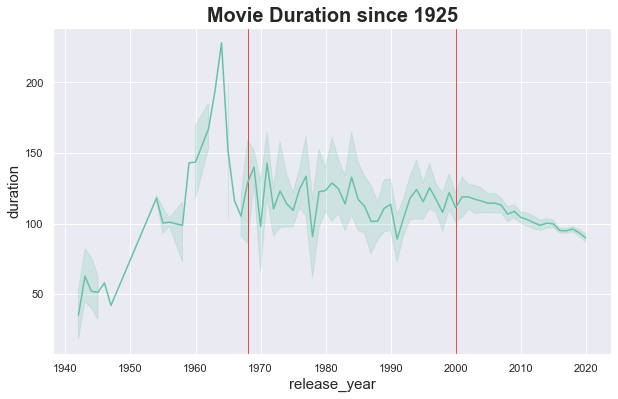

In [1687]:
plt.axvline(x=1968, color="red", linewidth=.7)
plt.axvline(x=2000, color="red", linewidth=.7)
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_cleaned[is_movie]).set_title("Movie Duration since 1925")
saveplot()

That looks like the plot before. <br>
We will slice once at 1968 and once at 2000.

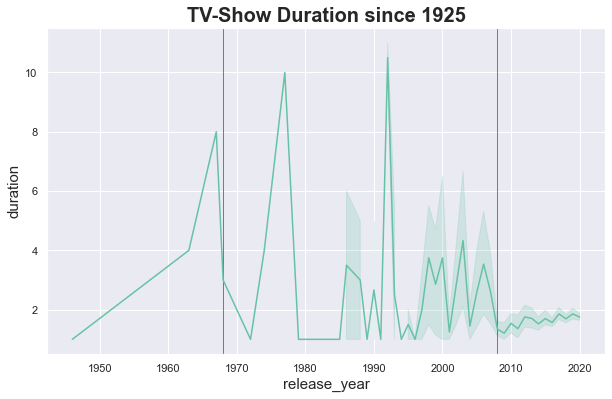

In [1688]:
plt.axvline(x=1968, color="red", linewidth=.7)
plt.axvline(x=2008, color="red", linewidth=.7)
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_cleaned[~is_movie]).set_title("TV-Show Duration since 1925")
saveplot()

That looks pretty different. <br>
The data are very volatile until 2008 <br>
The TV-Shows we will slice once at 1968 and once at 2008.

In [1689]:
is_ge_1968 = df_cleaned[RELEASE_YEAR] >= 1968
is_ge_2000 = df_cleaned[RELEASE_YEAR] >= 2000
is_ge_2008 = df_cleaned[RELEASE_YEAR] >= 2009

df_movie_since_1968 = df_cleaned[(is_movie) & (is_ge_1968)]
df_movie_since_2000 = df_cleaned[(is_movie) & (is_ge_2000)]

df_tv_since_1968 = df_cleaned[(~is_movie) & (is_ge_1968)]
df_tv_since_2008 = df_cleaned[(~is_movie) & (is_ge_2008)]

df_tv_since_1968.shape[0], df_tv_since_2008.shape[0], df_movie_since_1968.shape[0], df_movie_since_2000.shape[0]

(2387, 2251, 5325, 4963)

### Does the Movie-Duration decreasing over the time (since 2000)?

##### Why since 2000

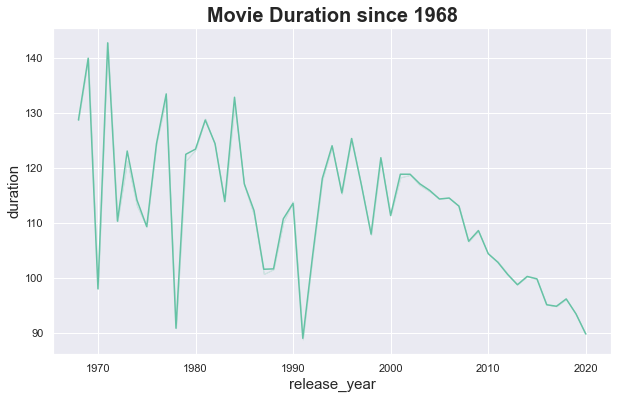

In [1690]:
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_1968, ci=False).set_title("Movie Duration since 1968")
saveplot()

Until the 2000s is a high volatility in the data. That could be an indicator for so low data density (before 2000s).

In [1691]:
total_data_count_since_1968 = df_movie_since_1968.shape[0]
data_count_in_1968_1999 = df_movie_since_1968[df_movie_since_1968[RELEASE_YEAR] < 2000].shape[0]
data_count_since_2000 = df_movie_since_2000.shape[0]

total_data_count_since_1968, data_count_in_1968_1999, data_count_since_2000

(5325, 362, 4963)

In [1692]:
f"The data since 2000 represents {(data_count_since_2000 / total_data_count_since_1968 * 100):.3f}% of the total data."

'The data since 2000 represents 93.202% of the total data.'

#### Development of Movie Duration since 2000

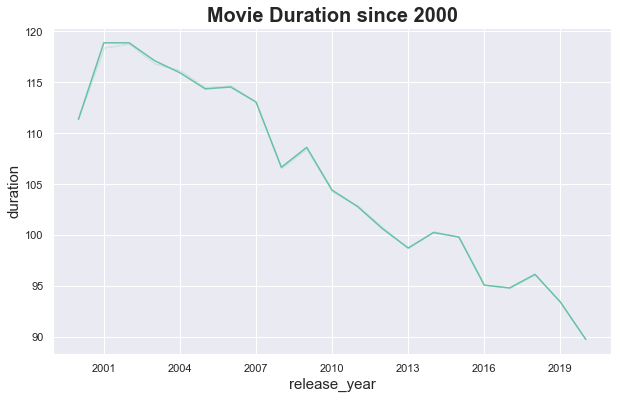

In [1693]:
fig = sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000, ci=False).set_title("Movie Duration since 2000")
xaxis_to_integers(fig.axes)
saveplot()

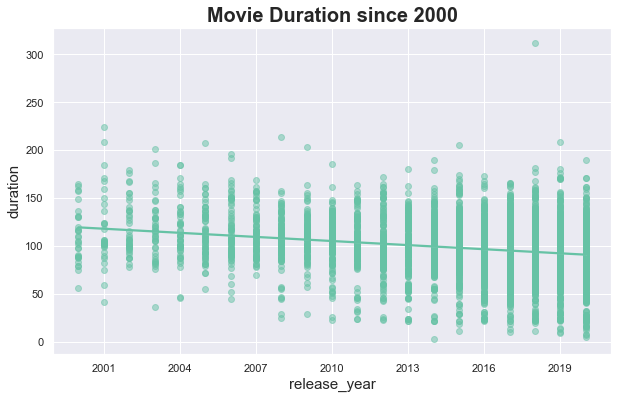

In [1694]:
fig = sns.regplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000, ci=False, scatter_kws={"alpha": .5}).set_title("Movie Duration since 2000")
xaxis_to_integers(fig.axes)
saveplot()

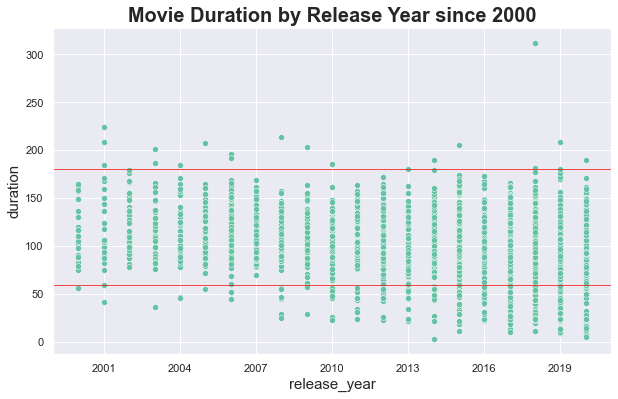

In [1695]:
plt.axhline(y=60, color="red", linewidth=.7)
plt.axhline(y=180, color="red", linewidth=.7)
fig = sns.scatterplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000).set_title("Movie Duration by Release Year since 2000")
xaxis_to_integers(fig.axes)
saveplot()

We recognize is a steady down trend at the duration of the movies over time. <br>
We also recognize, that much more movies will produces over time, especially since 2015 <br>
<br>
Since 2008 more and more short movies under 60 minutes will be produced. But a 'Movie' under 60 minutes, doesn't really are movies. <br>
Especially from 2001 to 2006 are a some movies longer then 3h. And because of the lower density of movies, these got an stronger impact then the view 3h-Movies after 2014. <br>

But nevertheless there is also a visible downward trend in the range of 60 and 180 minutes.

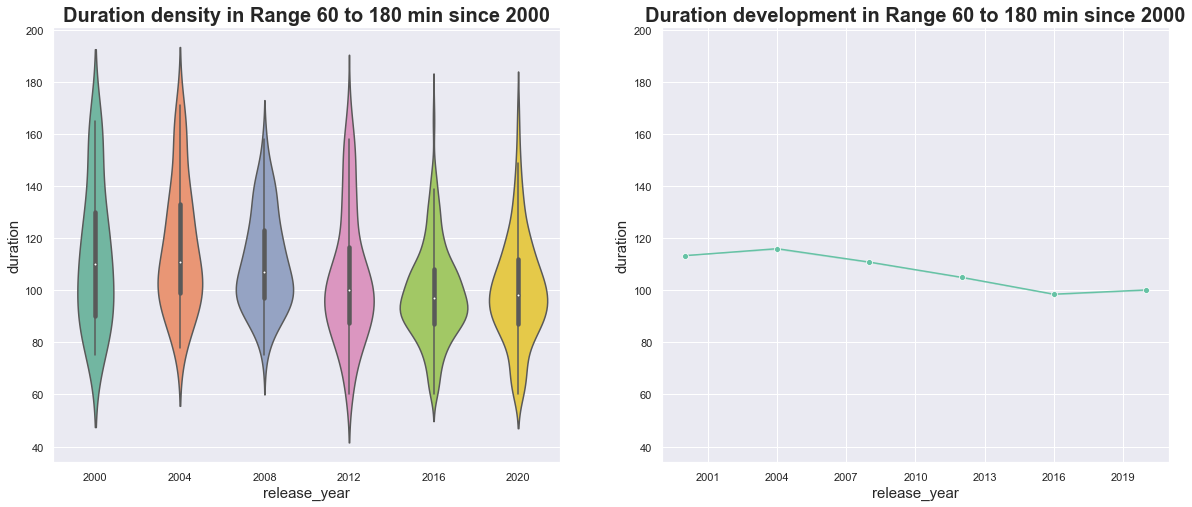

In [1696]:
year_range_60_180_filter = (df_movie_since_2000[RELEASE_YEAR].isin(np.arange(2000, 2021, 4))) & (df_movie_since_2000[DURATION] >= 60) & (df_movie_since_2000[DURATION] <= 180)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1, ax2 = axes
ax2.sharey(ax1)
xaxis_to_integers(ax2)
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000[year_range_60_180_filter], ci=False, marker="o", ax=ax2).set_title("Duration development in Range 60 to 180 min since 2000")
sns.violinplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000[year_range_60_180_filter], ax=ax1).set_title("Duration density in Range 60 to 180 min since 2000")
saveplot(plot_name="Duration density and development in range 60 to 180 min")

Here it becomes clear. From 2008 to 2012 there an significant redistribution at the density.

The picture is clear but we still got Movie-Genre in our data, which aren't represent normal movies. <br>
Let's take a closer look to the genre.

#### Movie-Duration by Genre

In [1697]:
top_ten_movie_genres = df_movie_since_2000[GENRE].value_counts()[:10]
top_ten_movie_genres

Dramas                  1303
Comedies                1000
Documentaries            735
Action                   615
Children                 476
Stand-Up                 306
Horror Movies            239
International Movies     113
Uncategorized             55
Thrillers                 44
Name: genre, dtype: int64

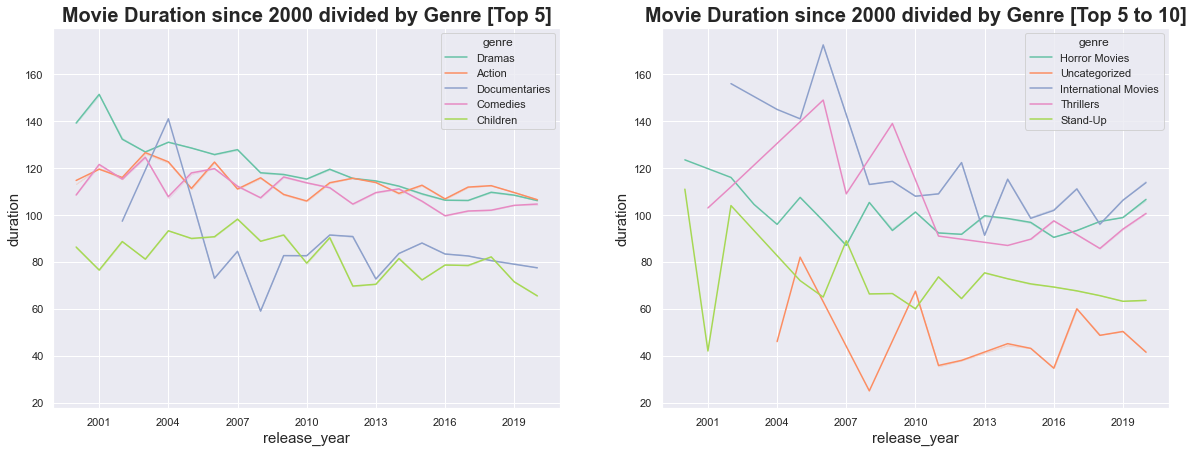

In [1698]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
ax1, ax2 = axes

df_movie_since_2000_top_5 = df_movie_since_2000[df_movie_since_2000[GENRE].isin(top_ten_movie_genres.index[:5])]
df_movie_since_2000_top_5_to_10 = df_movie_since_2000[df_movie_since_2000[GENRE].isin(top_ten_movie_genres.index[5:])]
ax2.sharey(ax1)
ax2.sharex(ax1)
xaxis_to_integers(ax1)
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000_top_5, hue=GENRE, ci=False, ax=ax1).set_title("Movie Duration since 2000 divided by Genre [Top 5]")
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000_top_5_to_10, hue=GENRE, ci=False, ax=ax2).set_title("Movie Duration since 2000 divided by Genre [Top 5 to 10]")
saveplot(plot_name="Movie Duration since 2000 divided by Top 5 and 10")

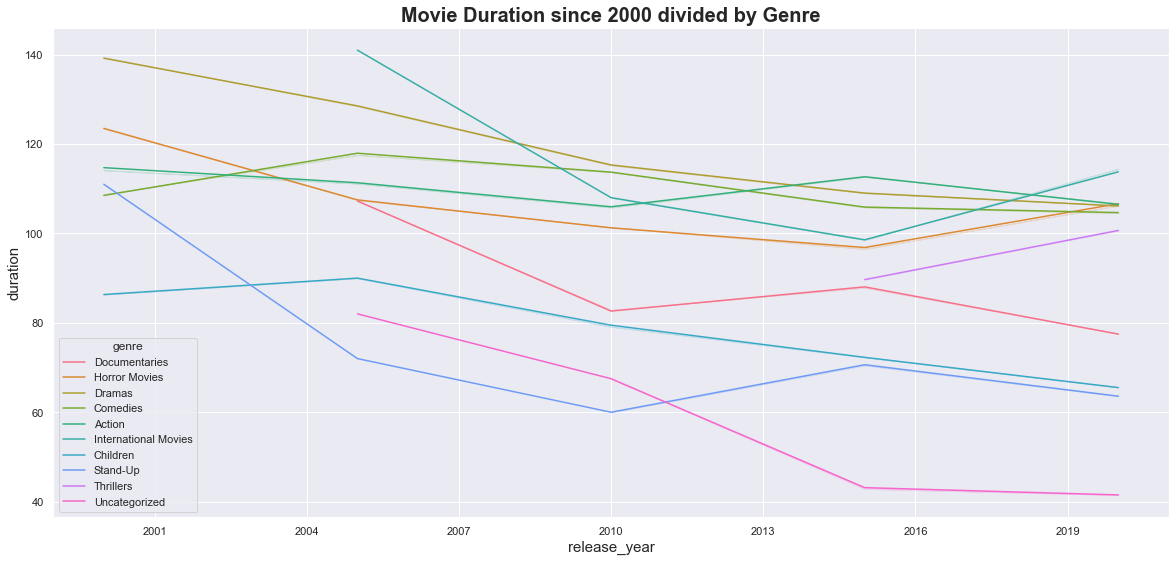

In [1699]:
plt.figure(figsize=(20, 9))
year_and_top_genre_filter = (df_movie_since_2000[RELEASE_YEAR].isin(np.arange(2000, 2021, 5))) & (df_movie_since_2000[GENRE].isin(top_ten_movie_genres.index))
fig = sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000[year_and_top_genre_filter], hue=GENRE, ci=False).set_title("Movie Duration since 2000 divided by Genre")
xaxis_to_integers(fig.axes)
saveplot()

A steady downward trend can also be seen within the genres.

In [1700]:
df_movie_since_2000.pivot_table(index=GENRE, values=DURATION, aggfunc=MEAN).sort_values(by=DURATION, ascending=False)

,duration
genre,
Classic Movies,122.000000
Cult Movies,114.000000
Action,111.786992
Dramas,110.999233
International Movies,109.415929
Sci-Fi,108.090909
Comedies,106.144000
LGBTQ Movies,99.000000
Independent Movies,98.700000


As we can see, "normal" genres like action, horror, thrillers until romantic movies got an longer movie duration as genres like [Documentaries, Children, Stand-Up, Uncategorized] <br>

#### Development of Genres popularity

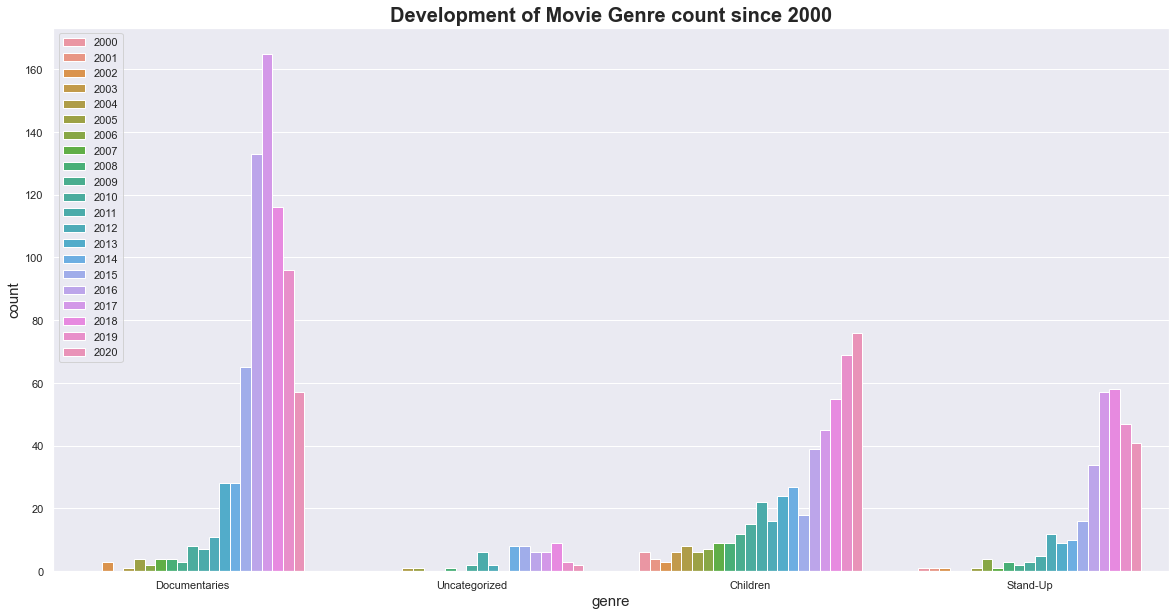

In [1701]:
short_movie_genres = ["Documentaries", "Children", "Stand-Up", "Uncategorized"]

plt.figure(figsize=(20, 10))
sns.countplot(x=GENRE, hue=RELEASE_YEAR, hue_order=np.arange(2000, 2021), data=df_movie_since_2000[df_movie_since_2000[GENRE].isin(short_movie_genres)]).set_title("Development of Movie Genre count since 2000")
plt.legend(loc="upper left")
saveplot()

In [1702]:
df_movie_since_2000.pivot_table(index=GENRE, values=DURATION, columns=RELEASE_YEAR, aggfunc=MEAN)

release_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
genre,,,,,,,,,,,,,,,,,,,,,
Action,114.714286,119.500000,116.000000,126.583333,122.666667,111.333333,122.555556,111.071429,115.857143,108.764706,...,113.750000,115.653846,113.807692,109.217391,112.680000,106.858974,111.887500,112.493671,109.547619,106.500000
Anime Features,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,110.000000,NaN,46.000000,NaN,90.000000,118.333333,101.000000,80.500000,85.750000,104.000000
Children,86.333333,76.500000,88.666667,81.166667,93.250000,90.000000,90.714286,98.222222,88.777778,91.416667,...,90.272727,69.687500,70.458333,81.407407,72.277778,78.641026,78.488889,82.127273,71.507246,65.513158
Classic Movies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.000000,NaN,NaN
Comedies,108.500000,121.545455,115.333333,124.600000,107.800000,117.944444,119.750000,112.277778,107.333333,116.218750,...,111.633333,104.638298,109.545455,111.120690,105.890411,99.663636,101.687023,102.037037,104.103774,104.661972
Cult Movies,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,158.000000,NaN,NaN,...,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,110.000000,NaN,NaN
Documentaries,NaN,NaN,97.333333,NaN,141.000000,107.250000,73.000000,84.500000,59.000000,82.666667,...,91.428571,90.818182,72.678571,83.571429,88.046154,83.345865,82.515152,80.534483,78.989583,77.473684
Dramas,139.200000,151.428571,132.285714,126.875000,131.000000,128.533333,125.764706,127.863636,118.000000,117.272727,...,119.500000,115.594595,114.518519,112.295082,109.023622,106.315217,106.184211,109.688442,108.445946,106.146067
Horror Movies,123.500000,NaN,116.000000,104.500000,96.000000,107.500000,97.500000,87.000000,105.333333,93.375000,...,92.333333,91.750000,99.666667,98.500000,96.846154,90.444444,93.342105,97.219512,98.900000,106.650000


In [1703]:
df_movie_since_2000.pivot_table(index=GENRE, values=DURATION, columns=RELEASE_YEAR, aggfunc=COUNT)

release_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
genre,,,,,,,,,,,,,,,,,,,,,
Action,7.0,8.0,12.0,12.0,15.0,12.0,9.0,14.0,21.0,17.0,...,20.0,26.0,26.0,23.0,50.0,78.0,80.0,79.0,42.0,38.0
Anime Features,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,3.0,4.0,4.0,4.0,1.0
Children,6.0,4.0,3.0,6.0,8.0,6.0,7.0,9.0,9.0,12.0,...,22.0,16.0,24.0,27.0,18.0,39.0,45.0,55.0,69.0,76.0
Classic Movies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Comedies,8.0,11.0,3.0,10.0,10.0,18.0,24.0,18.0,30.0,32.0,...,30.0,47.0,44.0,58.0,73.0,110.0,131.0,135.0,106.0,71.0
Cult Movies,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Documentaries,NaN,NaN,3.0,NaN,1.0,4.0,2.0,4.0,4.0,3.0,...,7.0,11.0,28.0,28.0,65.0,133.0,165.0,116.0,96.0,57.0
Dramas,5.0,7.0,14.0,8.0,10.0,15.0,17.0,22.0,27.0,22.0,...,26.0,37.0,54.0,61.0,127.0,184.0,190.0,199.0,148.0,89.0
Horror Movies,2.0,NaN,1.0,4.0,1.0,2.0,4.0,2.0,3.0,8.0,...,6.0,4.0,9.0,16.0,13.0,27.0,38.0,41.0,30.0,20.0


In [1704]:
is_2000_2009 = df_movie_since_2000[RELEASE_YEAR] <= 2009
df_movie_since_2000_2009 = df_movie_since_2000[is_2000_2009]
df_movie_2010_2020 = df_movie_since_2000[~is_2000_2009]

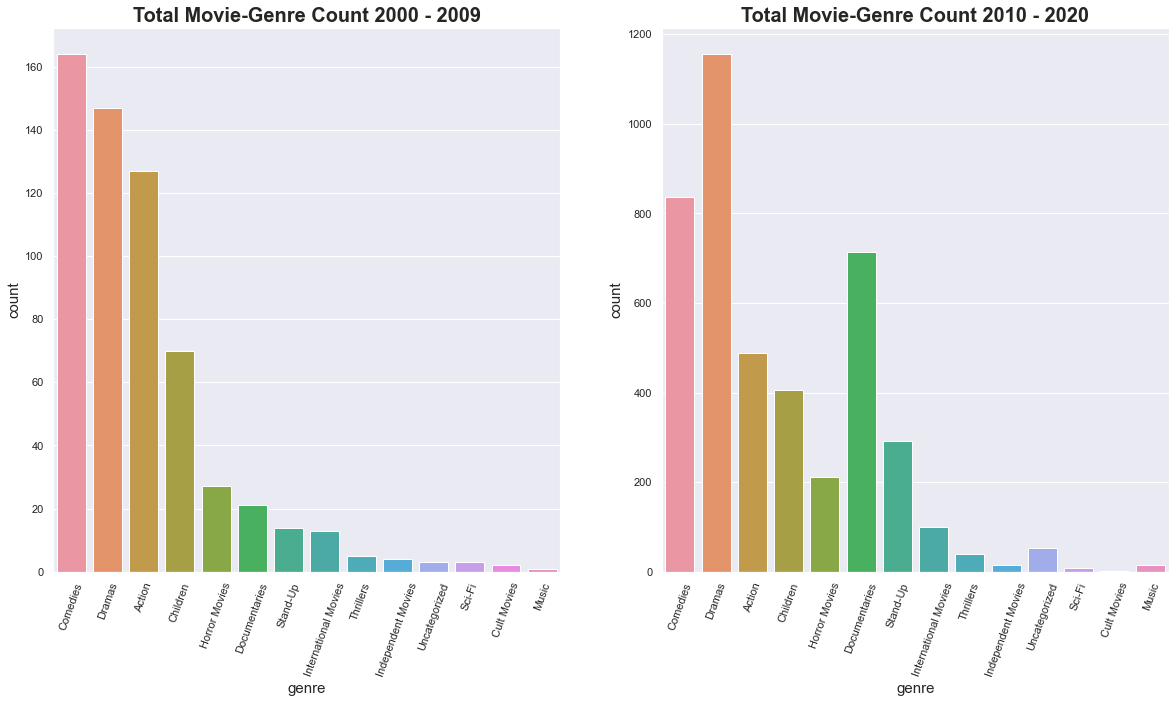

In [1705]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1, ax2 = axes
ax1.xaxis.set_tick_params(rotation=70)
ax2.xaxis.set_tick_params(rotation=70)
order = df_movie_since_2000_2009[GENRE].value_counts().index
sns.countplot(x=GENRE, data=df_movie_since_2000_2009, ax=ax1, order=order).set_title("Total Movie-Genre Count 2000 - 2009")
sns.countplot(x=GENRE, data=df_movie_2010_2020, ax=ax2, order=order).set_title("Total Movie-Genre Count 2010 - 2020")
saveplot(plot_name="Total Movie-Genre Count divided by 00'-09' and 10'-20'")

We can see that in relation to the the data from 2000 to 2010 the number of Documentaries exploding and the other low duration genres like Stand-Up, Uncategorized are more present, then 2000 to 2010.

In [1706]:
COUNT_2000_2009 = "count_2000_2009"
COUNT_2010_2020 = "count_2010_2020"
df_2000_2009_movie_genre_counts = df_movie_since_2000_2009.pivot_table(index=GENRE, values=DURATION, aggfunc=COUNT).rename(columns={DURATION: "count_2000_2009"}).reset_index()
df_2010_2020_movie_genre_counts = df_movie_2010_2020.pivot_table(index=GENRE, values=DURATION, aggfunc=COUNT).rename(columns={DURATION: "count_2010_2020"}).reset_index()
merged_movie_genre_count = pd.merge(df_2000_2009_movie_genre_counts, df_2010_2020_movie_genre_counts, on=GENRE, how="left")
merged_movie_genre_count

,genre,count_2000_2009,count_2010_2020
0,Action,127,488
1,Children,70,406
2,Comedies,164,836
3,Cult Movies,2,2
4,Documentaries,21,714
5,Dramas,147,1156
6,Horror Movies,27,212
7,Independent Movies,4,16
8,International Movies,13,100
9,Music,1,16


In [1707]:
INCREASE_RATE = "increase_rate"
merged_movie_genre_count[INCREASE_RATE] = merged_movie_genre_count[COUNT_2010_2020] / merged_movie_genre_count[COUNT_2000_2009]
merged_movie_genre_count.sort_values(by=INCREASE_RATE, ascending=False)

,genre,count_2000_2009,count_2010_2020,increase_rate
4,Documentaries,21,714,34.000000
11,Stand-Up,14,292,20.857143
13,Uncategorized,3,52,17.333333
9,Music,1,16,16.000000
5,Dramas,147,1156,7.863946
6,Horror Movies,27,212,7.851852
12,Thrillers,5,39,7.800000
8,International Movies,13,100,7.692308
1,Children,70,406,5.800000
2,Comedies,164,836,5.097561


,genre,increase_rate
4,Documentaries,34.000000
11,Stand-Up,20.857143
13,Uncategorized,17.333333
9,Music,16.000000
5,Dramas,7.863946
6,Horror Movies,7.851852
12,Thrillers,7.800000
8,International Movies,7.692308
1,Children,5.800000
2,Comedies,5.097561


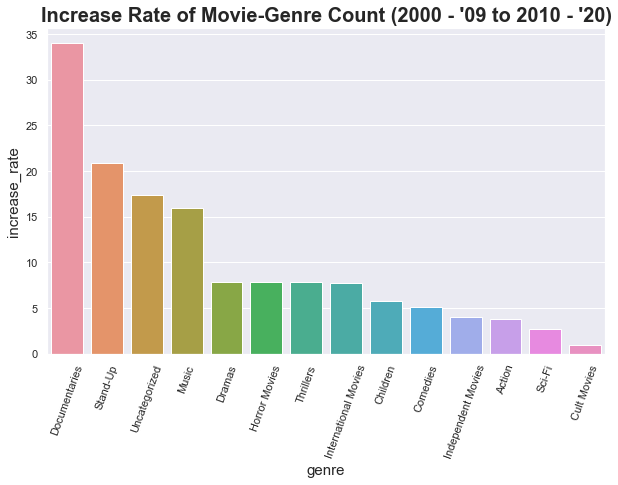

In [1708]:
plt.xticks(rotation=70)
order = merged_movie_genre_count.sort_values(by=INCREASE_RATE, ascending=False)[GENRE]
sns.barplot(y=INCREASE_RATE, x=GENRE, data=merged_movie_genre_count, order=order).set_title("Increase Rate of Movie-Genre Count (2000 - '09 to 2010 - '20)")
saveplot()

merged_movie_genre_count[[GENRE, INCREASE_RATE]].sort_values(by=INCREASE_RATE, ascending=False)

In [1709]:
cmap_series = df_movie_since_2000[GENRE].copy()
cmap_series[~cmap_series.isin(short_movie_genres)] = "Normal"
cmap_series

1              Normal
2              Normal
3              Normal
4              Normal
6              Normal
            ...      
7781         Children
7782           Normal
7783           Normal
7784    Documentaries
7786    Documentaries
Name: genre, Length: 4963, dtype: object

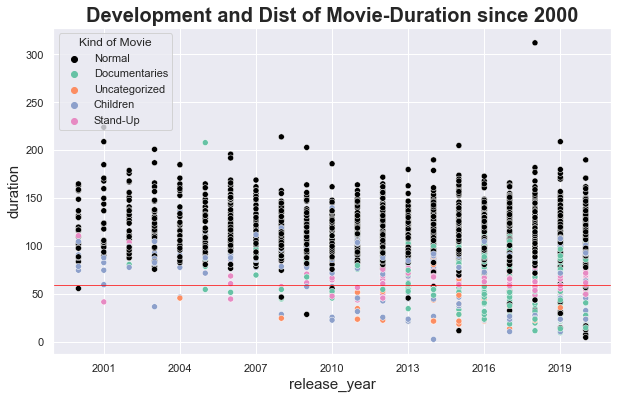

In [1710]:
plt.axhline(y=60, color="red", linewidth=.7)
fig = sns.scatterplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000, hue=cmap_series, palette=["black", "C0", "C1", "C2", "C3"]).set_title("Development and Dist of Movie-Duration since 2000")

xaxis_to_integers(fig.axes)
plt.legend(title="Kind of Movie", loc="upper left")
saveplot()

As we can see, the most shorter movies are the abnormal movie genres. <br>
And we found out, that exacly these genres got the highest increasing rate after 2009.

We drop Genres: Documentaries, Stand-Up, Uncategorized, Children and Movies under 60 minutes + over 180 minutes
- under 60 minutes, because these aren't real movies and with more movies, there came more short movies. But these are not representative for our question
- over 180 minutes, because these got in a lower data density an higher impact of the mean
- the others, because they are shorter then normal movies and don't represent normal movies

In [1711]:
is_duration_ge_60_and_le_180_min = (df_movie_since_1968[DURATION] >= 60) & (df_movie_since_1968[DURATION] <= 180)
is_not_short_movie = ~df_movie_since_1968[GENRE].isin(short_movie_genres)

df_movie_cleaned_since_1968 = df_movie_since_1968.loc[(is_duration_ge_60_and_le_180_min) & (is_not_short_movie)]
df_movie_cleaned_since_1968

,release_year,duration,type,country,genre
1,2016,93,Movie,Mexico,Dramas
2,2011,78,Movie,Singapore,Horror Movies
3,2009,80,Movie,United States,Action
4,2008,123,Movie,United States,Dramas
6,2019,95,Movie,Egypt,Horror Movies
...,...,...,...,...,...
7774,2007,158,Movie,United States,Cult Movies
7778,2009,88,Movie,United States,Comedies
7780,2018,94,Movie,India,Dramas
7782,2005,99,Movie,Sweden,Dramas


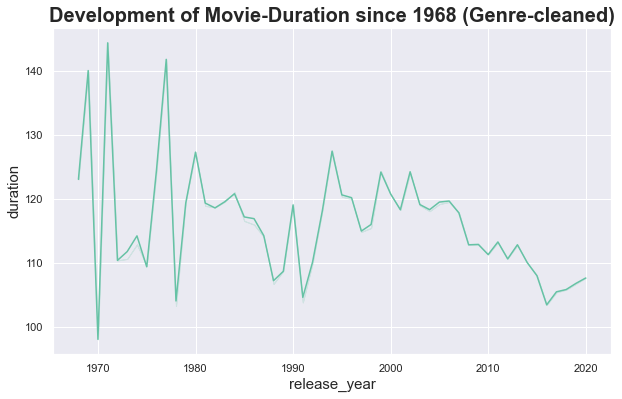

In [1712]:
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_cleaned_since_1968, ci=False).set_title("Development of Movie-Duration since 1968 (Genre-cleaned)")
saveplot()

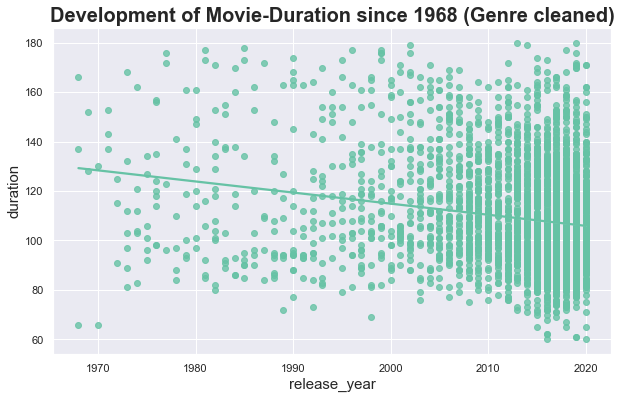

In [1713]:
sns.regplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_cleaned_since_1968, ci=False).set_title("Development of Movie-Duration since 1968 (Genre cleaned)")
saveplot()

In [1714]:
df_movie_cleaned_since_2000 = df_movie_cleaned_since_1968[df_movie_cleaned_since_1968[RELEASE_YEAR] >= 2000]
df_movie_cleaned_since_2000

,release_year,duration,type,country,genre
1,2016,93,Movie,Mexico,Dramas
2,2011,78,Movie,Singapore,Horror Movies
3,2009,80,Movie,United States,Action
4,2008,123,Movie,United States,Dramas
6,2019,95,Movie,Egypt,Horror Movies
...,...,...,...,...,...
7774,2007,158,Movie,United States,Cult Movies
7778,2009,88,Movie,United States,Comedies
7780,2018,94,Movie,India,Dramas
7782,2005,99,Movie,Sweden,Dramas


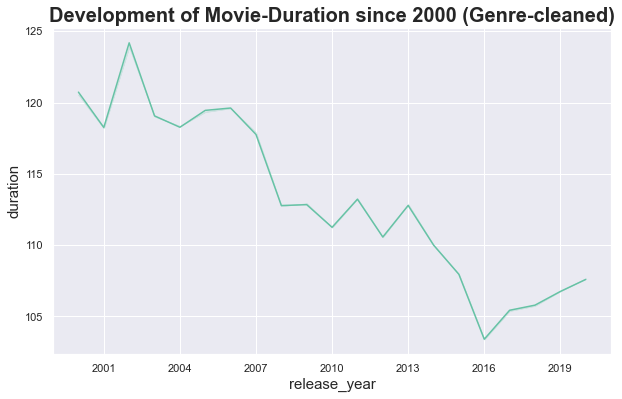

In [1715]:
fig = sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_cleaned_since_2000, ci=False).set_title("Development of Movie-Duration since 2000 (Genre-cleaned)")
xaxis_to_integers(fig.axes)
saveplot()

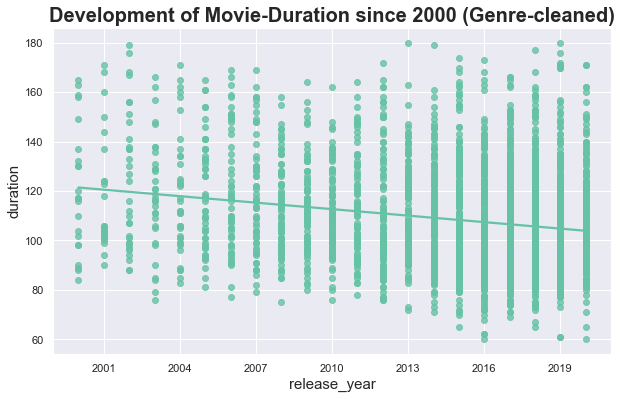

In [1716]:
fig = sns.regplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_cleaned_since_2000, ci=False).set_title("Development of Movie-Duration since 2000 (Genre-cleaned)")
xaxis_to_integers(fig.axes)
saveplot()

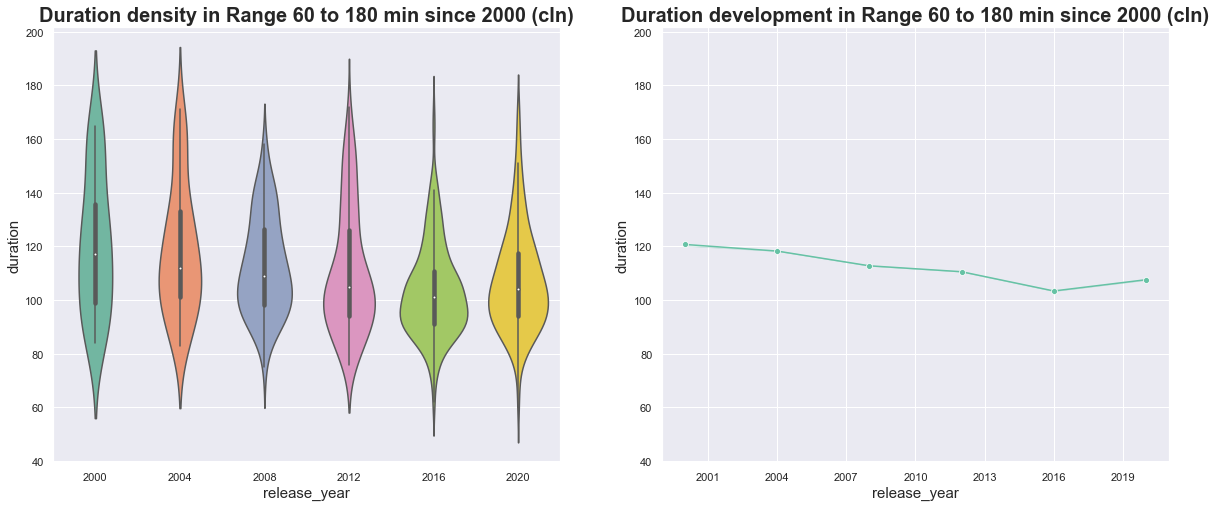

In [1717]:
year_range_filter = (df_movie_cleaned_since_2000[RELEASE_YEAR].isin(np.arange(2000, 2021, 4)))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1, ax2 = axes
ax2.sharey(ax1)
xaxis_to_integers(ax2)
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_cleaned_since_2000[year_range_filter], ci=False, marker="o", ax=ax2).set_title("Duration development in Range 60 to 180 min since 2000 (cln)")
sns.violinplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_cleaned_since_2000[year_range_filter], ax=ax1).set_title("Duration density in Range 60 to 180 min since 2000 (cln)")
saveplot(plot_name="Duration density and development in range 60 to 180 min")

In [1718]:
df_movie_cleaned_since_2000[year_range_filter].pivot_table(index=RELEASE_YEAR, values=DURATION, aggfunc=MEAN)

,duration
release_year,
2000,120.727273
2004,118.263158
2008,112.771084
2012,110.564103
2016,103.394860
2020,107.585903


In [1719]:
df_movie_cleaned_since_2000[year_range_filter].pivot_table(index=RELEASE_YEAR, values=DURATION, aggfunc=MEDIAN)

,duration
release_year,
2000,117
2004,112
2008,109
2012,105
2016,101
2020,104


#### Movie-Duration Conclusion

Finally we can say, that the movie duration decrease over the time (2000 to 2020). <br>
We removed abnormal genres, took the representative time horizon (since 2000 -> 93% of the total data), choose the a normal movie duration of 60 to 180 minutes and the result stay the same.

### Does the TV-Show-Duration decreasing over the time (since 2008)?

#### Why since 2008?

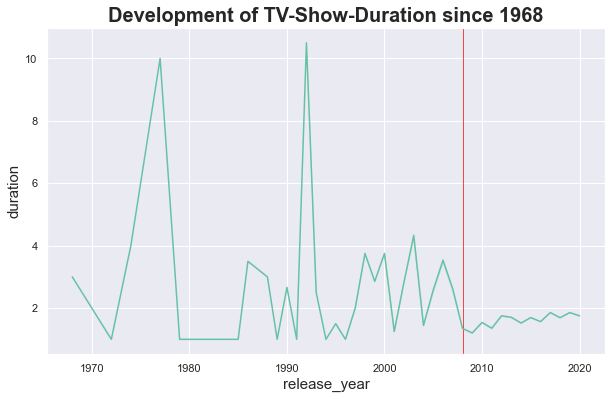

In [1720]:
plt.axvline(x=2008, color="red", linewidth=.7)
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_tv_since_1968, ci=False).set_title("Development of TV-Show-Duration since 1968")
saveplot()

In this data is a very high volatility, but since 2008 is a steady trend. <br>
Let's take a closer look to the data since 2008!

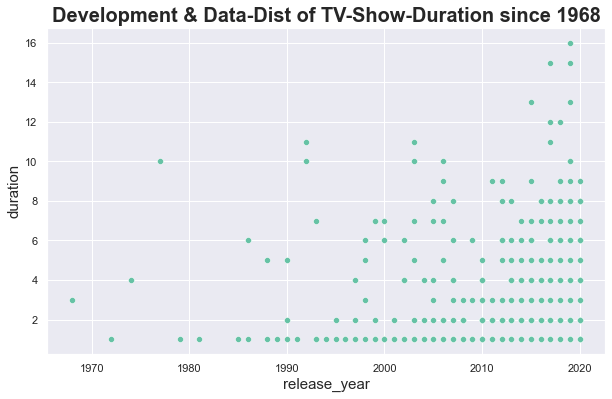

In [1721]:
sns.scatterplot(x=RELEASE_YEAR, y=DURATION, data=df_tv_since_1968).set_title("Development & Data-Dist of TV-Show-Duration since 1968")
saveplot()

In [1722]:
df_tv_since_1968.pivot_table(index=RELEASE_YEAR, values=DURATION, aggfunc=COUNT)

,duration
release_year,
1968,1
1972,1
1974,1
1977,1
1979,1
1981,1
1985,1
1986,2
1988,2


In [1723]:
df_tv_since_2008 = df_tv_since_1968[df_tv_since_1968[RELEASE_YEAR] >= 2008]
df_tv_since_2008.shape[0], df_tv_since_1968.shape[0], f"Data prop since 2008: {(df_tv_since_2008.shape[0] / df_tv_since_1968.shape[0] * 100):.3f}%"

(2274, 2387, 'Data prop since 2008: 95.266%')

The data before 2008 got a very low density and the data since 2008 represents 95.303% of the total. <br>
So, lets focus for the TV-Shows on the data since 2008

#### Closer Look on Range 2008 to 2020

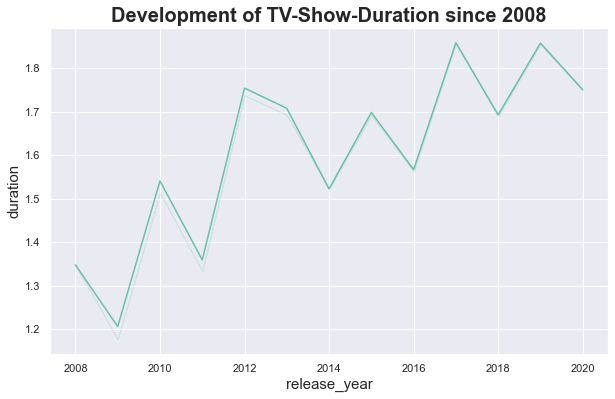

In [1724]:
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_tv_since_2008, ci=False).set_title("Development of TV-Show-Duration since 2008")
saveplot()

In [1725]:
df_tv_relevant_since_2008 = df_tv_since_2008[GENRE].value_counts()
relevant_tv_genres = df_tv_relevant_since_2008[df_tv_relevant_since_2008 >= 100].index
is_relevant_genre = df_tv_since_2008[GENRE].isin(relevant_tv_genres)
relevant_tv_genres

Index(['International TV', 'Crime TV', 'Kids', 'British TV', 'Docuseries',
       'Anime Series', 'TV Comedies'],
      dtype='object')

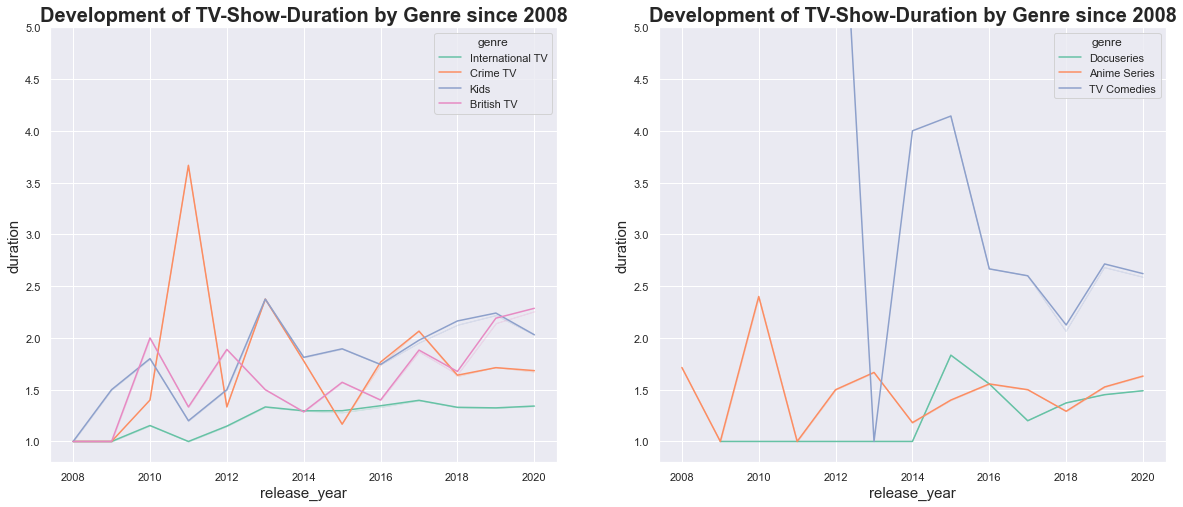

In [1726]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1, ax2 = axes
ax1.sharex(ax2)
ax1.sharey(ax2)
plt.ylim((0.8, 5))
title = "Development of TV-Show-Duration by Genre since 2008"
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_tv_since_2008[is_relevant_genre], hue=GENRE, hue_order=relevant_tv_genres[:4], ci=False, ax=ax1).set_title(title)
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_tv_since_2008[is_relevant_genre], hue=GENRE, hue_order=relevant_tv_genres[4:], ci=False, ax=ax2).set_title(title)
saveplot()

#### TV-Show-Duration Conclusion

Finally we can say that the duration of TV-Shows increasing continuously since 2008. 

## Which genre got the longest duration time?

In [1727]:
df_movie = df_cleaned[is_movie]
df_tv_show = df_cleaned[~is_movie]
df_cleaned.shape[0], df_tv_show.shape[0], df_movie.shape[0], df_tv_show.shape[0] + df_movie.shape[0]

(7755, 2390, 5365, 7755)

### Movie-Genres

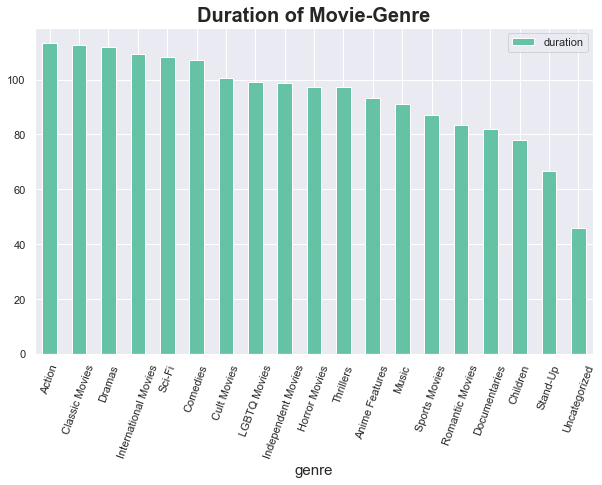

In [1728]:
top_movie_genres = df_movie.pivot_table(index=GENRE, values=DURATION, aggfunc=MEAN).sort_values(by=DURATION, ascending=False)
fig = top_movie_genres.plot.bar(rot=70, title="Duration of Movie-Genre")
saveplot()

In [1729]:
top_movie_genres["duration_in_hours"] = np.round(top_movie_genres[DURATION] / 60, 2)
top_movie_genres["duration_in_hours_string"] = top_movie_genres[DURATION].apply(lambda minutes: get_hours_string(minutes))
top_movie_genres

,duration,duration_in_hours,duration_in_hours_string
genre,,,
Action,113.279167,1.89,01:53h
Classic Movies,112.428571,1.87,01:52h
Dramas,111.814761,1.86,01:51h
International Movies,109.464912,1.82,01:49h
Sci-Fi,108.090909,1.80,01:48h
Comedies,107.214552,1.79,01:47h
Cult Movies,100.500000,1.68,01:40h
LGBTQ Movies,99.000000,1.65,01:39h
Independent Movies,98.700000,1.64,01:38h


### TV-Show-Genres

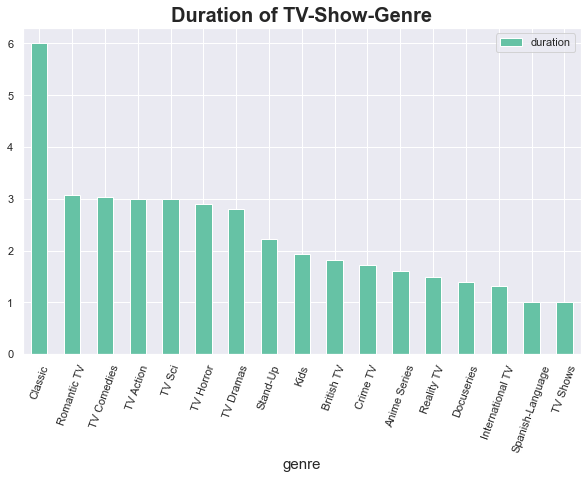

In [1730]:
top_tv_genres = df_tv_show.pivot_table(index=GENRE, values=DURATION, aggfunc=MEAN).sort_values(by=DURATION, ascending=False)
top_tv_genres.plot.bar(rot=70, title="Duration of TV-Show-Genre")
saveplot()

In [1731]:
top_tv_genres["duration_in_hours"] = np.round(top_tv_genres[DURATION] / 60, 2)
top_tv_genres["duration_in_hours_string"] = top_tv_genres[DURATION].apply(lambda minutes: get_hours_string(minutes))
top_tv_genres

,duration,duration_in_hours,duration_in_hours_string
genre,,,
Classic,6.000000,0.10,00:06h
Romantic TV,3.071429,0.05,00:03h
TV Comedies,3.036364,0.05,00:03h
TV Action,3.000000,0.05,00:03h
TV Sci,3.000000,0.05,00:03h
TV Horror,2.900000,0.05,00:02h
TV Dramas,2.806452,0.05,00:02h
Stand-Up,2.218750,0.04,00:02h
Kids,1.940845,0.03,00:01h


In [1732]:
df_tv_show[DURATION].max()

16

These data doesn't make sense. The duration TV-Shows will be higher then 1 to 6 minutes... <br>
The focus of the dataset was on the movies anyway!

## Which genre is the most produced

### Movie-Genre

Dramas                  1382
Comedies                1072
Documentaries            746
Action                   720
Children                 501
Stand-Up                 320
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Independent Movies        20
Anime Features            19
Music                     17
Cult Movies               12
Sci-Fi                    11
Romantic Movies            3
Sports Movies              1
LGBTQ Movies               1
Name: genre, dtype: int64

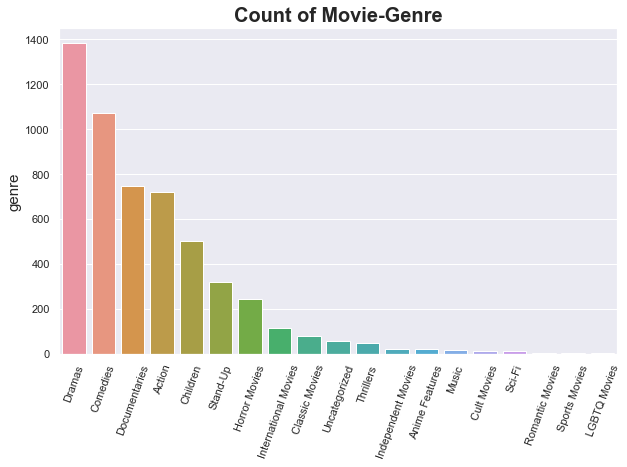

In [1733]:
movie_genre_count = df_movie[GENRE].value_counts()
plt.xticks(rotation=70)
sns.barplot(x=movie_genre_count.index, y=movie_genre_count).set_title("Count of Movie-Genre")
saveplot()

movie_genre_count

### TV-Show-Genre

International TV    688
Crime TV            367
Kids                355
British TV          231
Docuseries          190
Anime Series        147
TV Comedies         110
Reality TV          100
TV Dramas            62
TV Action            35
Stand-Up             32
Romantic TV          28
Classic              21
TV Shows             11
TV Horror            10
Spanish-Language      2
TV Sci                1
Name: genre, dtype: int64

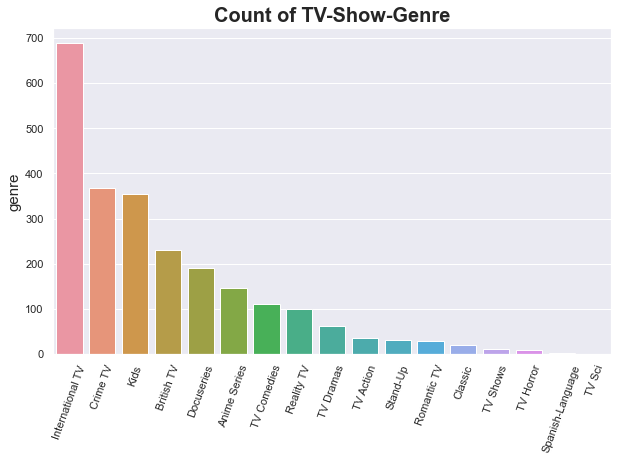

In [1734]:
tv_genres_count = df_tv_show[GENRE].value_counts()
plt.xticks(rotation=70)
sns.barplot(x=tv_genres_count.index, y=tv_genres_count).set_title("Count of TV-Show-Genre")
saveplot()

tv_genres_count

## Which country releases the most Movies / TV-Shows

In [1735]:
df_cleaned[COUNTRY].unique().shape

(82,)

In [1736]:
country_movie_tv_count = df_cleaned[COUNTRY].value_counts()
country_movie_tv_count[country_movie_tv_count > 100]

United States     2870
India              955
United Kingdom     575
Canada             258
Japan              237
France             196
South Korea        193
Spain              167
Mexico             121
Australia          108
Egypt              105
Turkey             105
Name: country, dtype: int64

In the following, we just choose the top 8 countries, for a good overview.

United States     2870
India              955
United Kingdom     575
Canada             258
Japan              237
France             196
South Korea        193
Spain              167
Name: country, dtype: int64

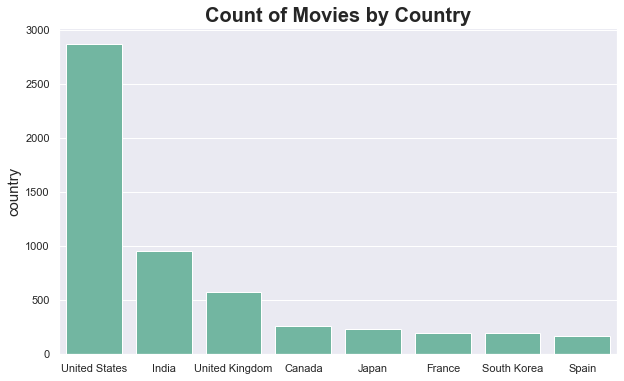

In [1737]:
top_8_country_movie_tv_count = country_movie_tv_count[:8]
sns.barplot(x=top_8_country_movie_tv_count.index, y=top_8_country_movie_tv_count, color="C0").set_title("Count of Movies by Country")
saveplot()

top_8_country_movie_tv_count

type,Movie,TV Show
country,,
United States,2097,773
India,883,72
United Kingdom,341,234
Canada,174,84
France,137,59
Spain,119,48
Japan,75,162
South Korea,41,152


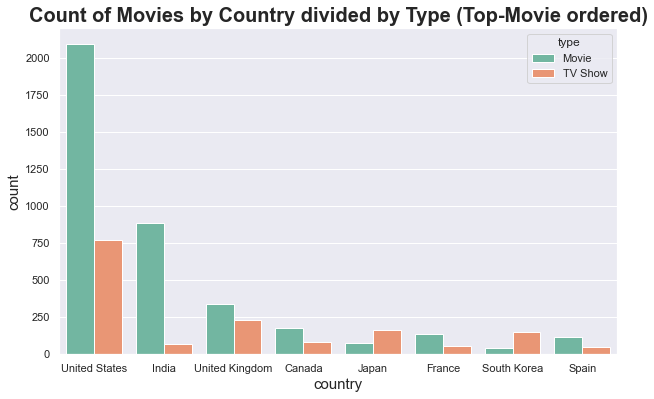

In [1738]:
sns.countplot(x=COUNTRY, hue=TYPE, data=df_cleaned, order=top_8_country_movie_tv_count.index, hue_order=["Movie", "TV Show"]).set_title("Count of Movies by Country divided by Type (Top-Movie ordered)")
saveplot()

df_cleaned[df_cleaned[COUNTRY].isin(top_8_country_movie_tv_count.index)].pivot_table(index=COUNTRY, columns=TYPE, values=DURATION, aggfunc=COUNT).sort_values(by=["Movie", "TV Show"], ascending=False)

type,Movie,TV Show
country,,
United States,2097,773
United Kingdom,341,234
Japan,75,162
South Korea,41,152
Canada,174,84
India,883,72
France,137,59
Spain,119,48


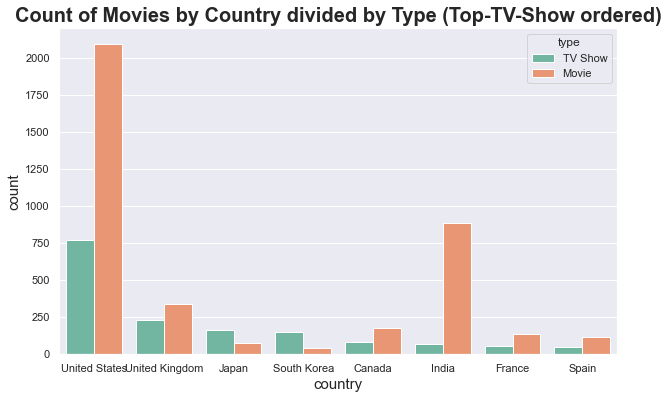

In [1739]:
top_8_country_tv_movie_count = df_cleaned[df_cleaned[COUNTRY].isin(top_8_country_movie_tv_count.index)].pivot_table(index=COUNTRY, columns=TYPE, values=DURATION, aggfunc=COUNT).sort_values(by=["TV Show", "Movie"], ascending=False)
sns.countplot(x=COUNTRY, hue=TYPE, data=df_cleaned, order=top_8_country_tv_movie_count.index, hue_order=["TV Show", "Movie"]).set_title("Count of Movies by Country divided by Type (Top-TV-Show ordered)")
saveplot()

top_8_country_tv_movie_count

## Which country releases the longest Movies / TV-Shows

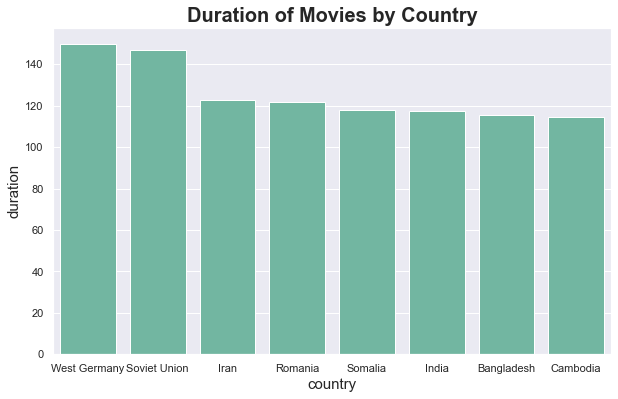

In [1740]:
top_8_country_durations = df_cleaned.pivot_table(index=COUNTRY, values=DURATION, aggfunc=MEAN).sort_values(by=DURATION, ascending=False).iloc[:8]
sns.barplot(x=top_8_country_durations.index, y=DURATION, data=top_8_country_durations, color="C0").set_title("Duration of Movies by Country")
saveplot()

In [1741]:
df_cleaned.pivot_table(index=COUNTRY, columns=TYPE, values=DURATION, aggfunc=MEAN).sort_values(by=["Movie", "TV Show"], ascending=False).iloc[:8]

type,Movie,TV Show
country,,
Croatia,157.000000,2.000000
West Germany,150.000000,NaN
Soviet Union,147.000000,NaN
India,126.922990,1.166667
Iran,123.000000,NaN
Pakistan,121.888889,1.000000
Romania,121.700000,NaN
Somalia,118.000000,NaN


In [1742]:
df_cleaned.pivot_table(index=COUNTRY, columns=TYPE, values=DURATION, aggfunc=COUNT).sort_values(by="TV Show", ascending=False).iloc[:8]

type,Movie,TV Show
country,,
United States,2097.0,773.0
United Kingdom,341.0,234.0
Japan,75.0,162.0
South Korea,41.0,152.0
Canada,174.0,84.0
India,883.0,72.0
Taiwan,12.0,70.0
France,137.0,59.0


In [1743]:
df_cleaned[df_cleaned[COUNTRY] == "West Germany"]

,release_year,duration,type,country,genre
2757,1977,150,Movie,West Germany,Documentaries


As we can see, the TV-Data is very inconsistent and has a lot missing values. <br>
We just take a single look at the TV-Shows!

,duration
country,
Denmark,2.727273
Ireland,2.666667
Finland,2.666667
Canada,2.535714
United States,2.347995
Australia,2.038462
Saudi Arabia,2.000000
Belarus,2.000000


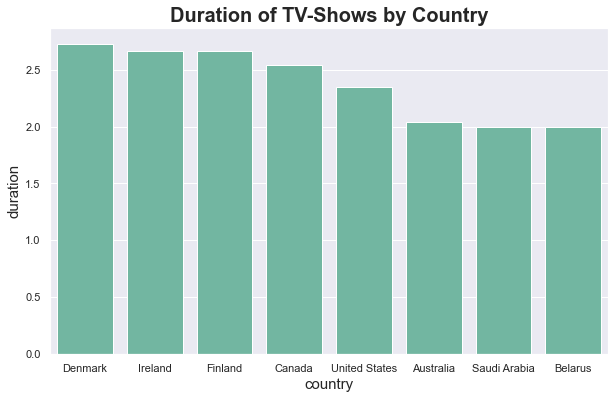

In [1744]:
top_8_tv_shows_by_country = df_tv_show.pivot_table(index=COUNTRY, values=DURATION, aggfunc=MEAN).sort_values(by=DURATION, ascending=False)[:8]
sns.barplot(x=top_8_tv_shows_by_country.index, y=DURATION, data=top_8_tv_shows_by_country, color="C0").set_title("Duration of TV-Shows by Country")
saveplot()

top_8_tv_shows_by_country